# Replacing parts of satellite images
In this notebook we load a satellite image and replace a part of it. Note: These kind of uses of generative artificial intelligence could be seen as scientific misconduct, e.g. if such images are further processed for analysis and usage of AI is not disclosed.

In [1]:
from skimage.io import imread
from image_utilities import replace
import stackview
import numpy as np

Image credits: modified Copernicus Sentinel data (2017), [CC BY-SA 3.0 IGO](https://creativecommons.org/licenses/by-sa/3.0/igo/). [Source](https://open.esa.int/copernicus-sentinel-satellite-imagery-under-open-licence/)

StackViewNDArray([[[133, 142, 141],
                   [140, 149, 148],
                   [149, 155, 155],
                   ...,
                   [ 28,  58,  84],
                   [ 49,  79, 105],
                   [ 30,  58,  80]],

                  [[119, 128, 127],
                   [128, 137, 136],
                   [137, 143, 143],
                   ...,
                   [ 55,  86, 114],
                   [ 30,  60,  86],
                   [ 37,  67,  91]],

                  [[126, 132, 132],
                   [130, 136, 136],
                   [128, 133, 136],
                   ...,
                   [ 38,  72, 100],
                   [ 39,  70,  98],
                   [ 19,  49,  75]],

                  ...,

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [229, 224, 221]],

                  [[229, 229, 231],
                   [229, 229, 231],
                   [229, 229, 231],
                   ...,
                   [220, 215, 212],
                   [222, 217, 214],
                   [224, 219, 216]],

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [219, 214, 211]]], dtype=uint8)
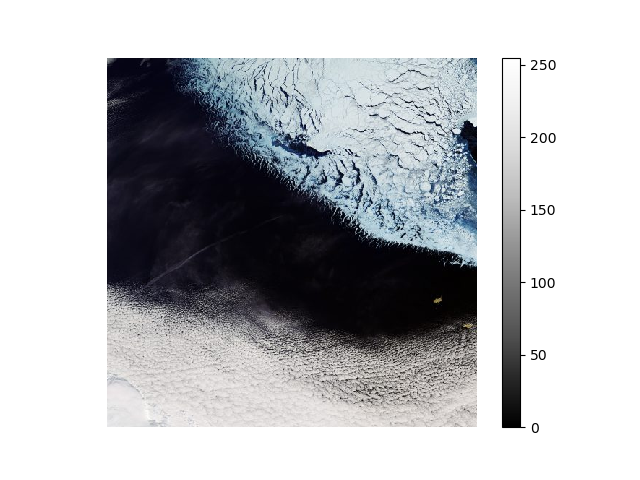
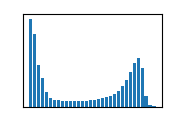

In [2]:
image = imread("https://open.esa.int/files/2017/05/Bering_Sea-768x779.jpg")[:512, :512]
stackview.insight(image)

We define a binary mask of the region we would like to replace.

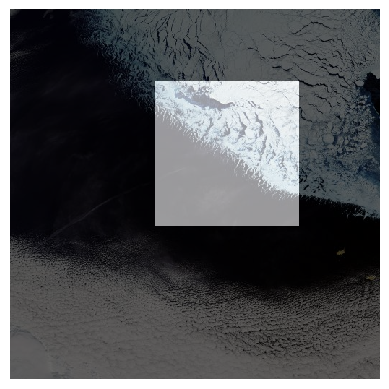

In [3]:
labels = np.zeros(image.shape[:2])
labels[100:300, 200:400] = 1

stackview.imshow(image, continue_drawing=True)
stackview.imshow(labels, alpha=0.6)

We replace the image, and also specify its size.

C:\structure\code\generative-ai-notebooks\docs\40_image_generation_openai\image_utilities.py:75: UserWarning: Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.
  warn("Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.")


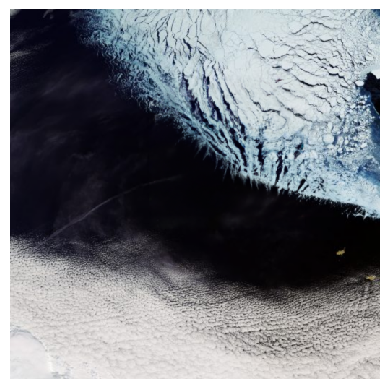

In [4]:
replaced_image = replace(image, labels)
stackview.imshow(replaced_image)

C:\Users\rober\miniforge3\envs\genai-gpu\Lib\site-packages\stackview\_animate.py:64: UserWarning: The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.
  warnings.warn("The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.")



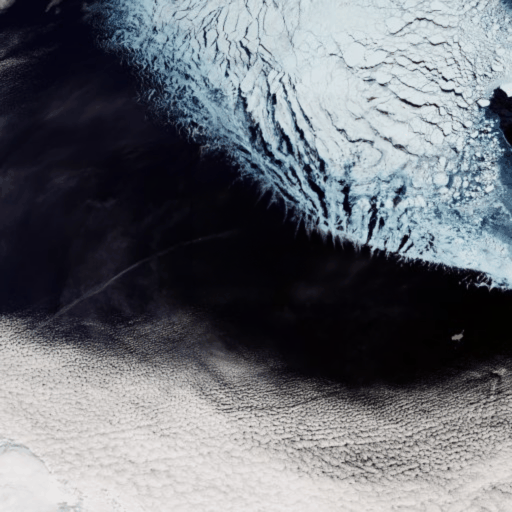

In [5]:
stackview.animate_curtain(image, replaced_image)